In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [16]:
class HMM(object):
    global initial_state,Model2
    
    #initializes the transition and current matrix respectively
    def __init__(self, transition_matrix_matrix,current_state):
        self.transition_matrix = transition_matrix_matrix
        self.current_state = current_state
    
    """calculate the new state using the observation matrix, transition matrix, and current state. 
    normalize the new state to make sure it sums to 1 and return new state """
    def filtering(self,observation_matrix):
        new_state = np.dot(observation_matrix,np.dot(self.transition_matrix,self.current_state))
        new_state_normalized = new_state/np.sum(new_state)
        self.current_state = new_state_normalized
        return new_state_normalized
    
    # calculate the new state using only the transition matrix and current state, normalize it and return the new state.
    def prediction(self):
        new_state = np.dot(self.transition_matrix,self.current_state)
        new_state_normalized = new_state/np.sum(new_state)
        self.current_state=new_state_normalized
        return new_state_normalized

    #creates a new figure with x,y,z positions and displays the plot
    def plot_state(self):
        fig = plt.figure()
        ax1 = fig.add_subplot(111, projection='3d')
        xpos = [0,0,1,2,2,1]
        ypos = [0,1,1,1,0,0]
        zpos = np.zeros(len(initial_state.shape))
        dx = np.ones(len(initial_state.shape))
        dy = np.ones(len(initial_state.shape))
        dz = self.current_state      
        ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, color='#4EE2EC')
        ax1.set_xticks([0., 1., 2.,3.])   
        ax1.set_yticks([0., 1., 2.]) 
        plt.show()
    
    # calculate the probability of the sensor readings being correct
    def create_observation_matrix(self,error_rate, no_discrepancies):
        sensor_list=[]
        for number in no_discrepancies:
            probability=(1-error_rate)**(4-number)*error_rate**number
            sensor_list.append(probability)
            observation_matrix = np.zeros((len(sensor_list),len(sensor_list)))
            np.fill_diagonal(observation_matrix,sensor_list)
        return observation_matrix

In [10]:
#   define two models
# change according to your map for the trasition matrix
transition_matrix = np.array([[0.2,0.4,0,0,0,0],
                              [0.8,0.2,0.267,0,0,0],
                              [0,0.4,0.2,0.4,0,0.8],
                              [0,0,0.267,0.2,0.8,0],
                              [0,0,0,0.4,0.2,0],
                              [0,0,0.267,0,0,0.2]]) 
#global initial_state    
initial_state=np.array([1/6,1/6,1/6,1/6,1/6,1/6])

Model = HMM(transition_matrix,initial_state)
Model2 = HMM(transition_matrix,initial_state)

In [11]:
#   create observation matrices based on the given MAP and given Sensor readings
observation_matrix_SWE = Model.create_observation_matrix(0.25,[0,3,4,3,0,0])
observation_matrix_NW = Model.create_observation_matrix(0.25,[3,0,1,2,3,3])
observation_matrix_N = Model.create_observation_matrix(0.25, [4,1,0,1,4,4])
observation_matrix_NE = Model.create_observation_matrix(0.25, [3,2,1,0,3,3])

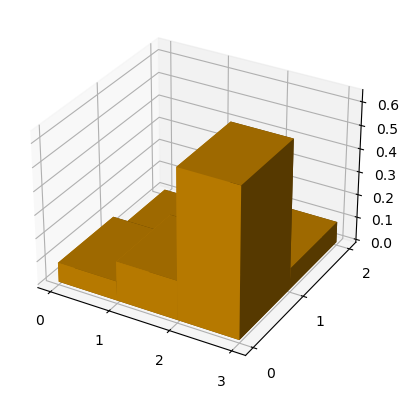

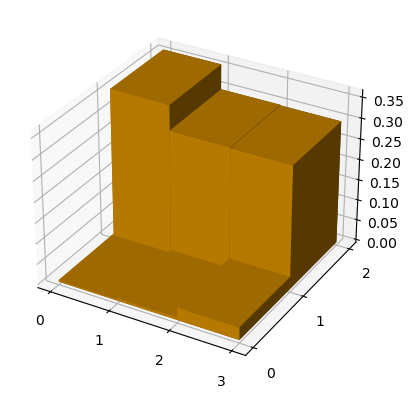

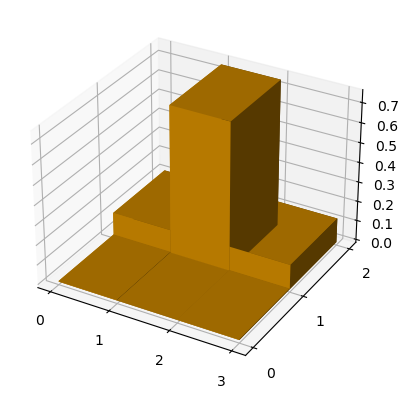

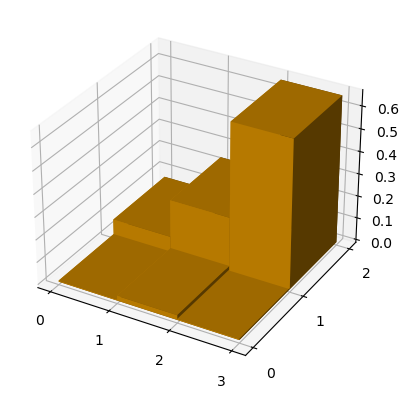

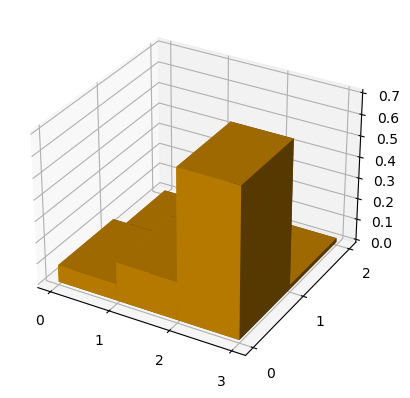

In [18]:
#   localize of the robot using filtering
state_1 = Model.filtering(observation_matrix_SWE)
Model.plot_state()
state_2 = Model.filtering(observation_matrix_NW)
Model.plot_state()
state_3 = Model.filtering(observation_matrix_N)
Model.plot_state()
state_4 = Model.filtering(observation_matrix_NE)
Model.plot_state()
state_5 = Model.filtering(observation_matrix_SWE)
Model.plot_state()

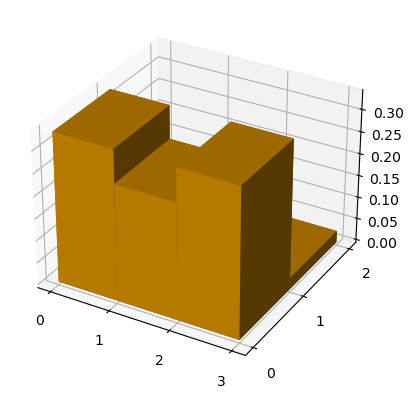

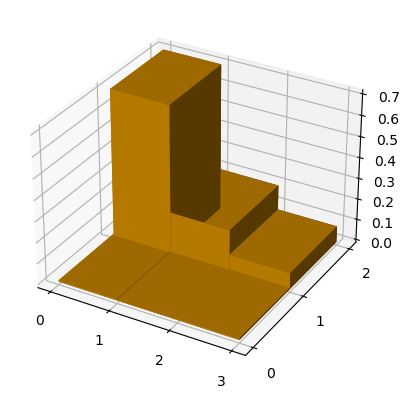

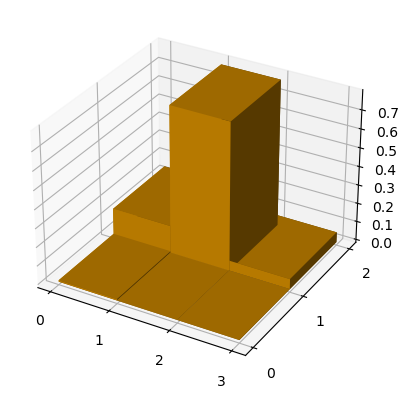

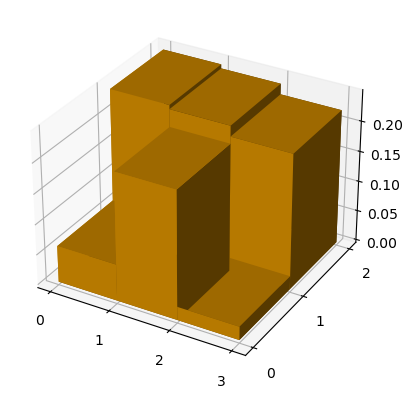

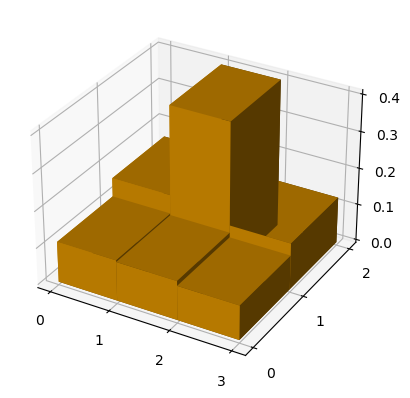

In [13]:
#   localize of the robot using filtering (three first timesteps) and prediction (two last timesteps)
state_6 = Model2.filtering(observation_matrix_SWE)
Model2.plot_state()
state_7 = Model2.filtering(observation_matrix_NW)
Model2.plot_state()
state_8 = Model2.filtering(observation_matrix_N)
Model2.plot_state()
prediction_1 = Model2.prediction()
Model2.plot_state()
prediction_2 = Model2.prediction()
Model2.plot_state()